# Data mining project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [2]:
#import data
imdb_raw= pd.read_excel("IMDB.xlsx")


In [47]:
imdb = imdb_raw.copy()

In [10]:
imdb.head()

,link,title,year,runtime,genre,globalRate,text,votes,stars,creator,story_line,tag_line,country_of_origin,language,color,sound_mix
0,/title/tt0000417/?ref_=adv_li_tt,Die Reise zum Mond,1902,13.0,Short,8.2,A group of astronomers go on an expedition to ...,48021,"Georges Méliès, Victor André, Bleuette Bernon,...",Georges Méliès,An association of astronomers has convened to ...,NaN,NaN,NaN,Black and White,Silent
1,/title/tt0004052/?ref_=adv_li_tt,The Hazards of Helen,1914,NaN,Action,7.0,"Helen, informed of the danger which menaces an...",108,"Helen Holmes, Helen Gibson, J.P. McGowan, Ethe...","J. Gunnis Davis, J.P. McGowan, Robert G. Vignola",NaN,NaN,NaN,NaN,NaN,NaN
2,/title/tt0004465/?ref_=adv_li_tt,The Perils of Pauline,1914,199.0,Action,6.3,"Pauline, a young maiden, must protect herself ...",1026,"Pearl White, Crane Wilbur, Paul Panzer, Edward...","Louis J. Gasnier, Donald MacKenzie",Young Pauline is left a lot of money when her ...,"The Eclectic Film Company's Great $25,000 Priz...",NaN,NaN,Black and White,Silent
3,/title/tt0006206/?ref_=adv_li_tt,Die Vampire,1915,421.0,Action,7.3,An intrepid reporter and his loyal friend batt...,4704,"Musidora, Édouard Mathé, Marcel Lévesque, Jean...",Louis Feuillade,NaN,NaN,NaN,NaN,NaN,NaN
4,/title/tt0010323/?ref_=adv_li_tt,Das Cabinet des Dr. Caligari,1920,76.0,Horror,8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",61840,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",Robert Wiene,"Francis, a young man, recalls in his memory th...","The most amazing story ever screened. , ...",Germany,German,NaN,NaN


In [11]:
imdb.shape

(25293, 16)

In [48]:
# remove unamed columns
imdb = imdb.loc[:, ~imdb.columns.str.contains('^Unnamed')]
# remove any white space in the header
imdb.columns = imdb.columns.str.replace('\s+', '', regex=True)

In [13]:
imdb.head()


,link,title,year,runtime,genre,globalRate,text,votes,stars,creator,story_line,tag_line,country_of_origin,language,color,sound_mix
0,/title/tt0000417/?ref_=adv_li_tt,Die Reise zum Mond,1902,13.0,Short,8.2,A group of astronomers go on an expedition to ...,48021,"Georges Méliès, Victor André, Bleuette Bernon,...",Georges Méliès,An association of astronomers has convened to ...,NaN,NaN,NaN,Black and White,Silent
1,/title/tt0004052/?ref_=adv_li_tt,The Hazards of Helen,1914,NaN,Action,7.0,"Helen, informed of the danger which menaces an...",108,"Helen Holmes, Helen Gibson, J.P. McGowan, Ethe...","J. Gunnis Davis, J.P. McGowan, Robert G. Vignola",NaN,NaN,NaN,NaN,NaN,NaN
2,/title/tt0004465/?ref_=adv_li_tt,The Perils of Pauline,1914,199.0,Action,6.3,"Pauline, a young maiden, must protect herself ...",1026,"Pearl White, Crane Wilbur, Paul Panzer, Edward...","Louis J. Gasnier, Donald MacKenzie",Young Pauline is left a lot of money when her ...,"The Eclectic Film Company's Great $25,000 Priz...",NaN,NaN,Black and White,Silent
3,/title/tt0006206/?ref_=adv_li_tt,Die Vampire,1915,421.0,Action,7.3,An intrepid reporter and his loyal friend batt...,4704,"Musidora, Édouard Mathé, Marcel Lévesque, Jean...",Louis Feuillade,NaN,NaN,NaN,NaN,NaN,NaN
4,/title/tt0010323/?ref_=adv_li_tt,Das Cabinet des Dr. Caligari,1920,76.0,Horror,8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",61840,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",Robert Wiene,"Francis, a young man, recalls in his memory th...","The most amazing story ever screened. , ...",Germany,German,NaN,NaN


In [14]:
imdb.shape

(25293, 16)

In [15]:
# statistical summary 
imdb.describe()

,year,runtime,globalRate,votes
count,25293.000000,25273.000000,25293.000000,2.529300e+04
mean,1989.729688,96.034978,6.444127,3.612501e+04
std,27.832168,59.032491,1.251144,1.089233e+05
min,1902.000000,1.000000,1.000000,5.000000e+00
25%,1971.000000,74.000000,5.800000,9.080000e+02
50%,1997.000000,92.000000,6.600000,3.982000e+03
75%,2015.000000,108.000000,7.300000,2.199500e+04
max,2022.000000,990.000000,9.900000,2.546371e+06


## Relationship betweeen popularity of a movie and its rating

<AxesSubplot:xlabel='globalRate', ylabel='votes'>

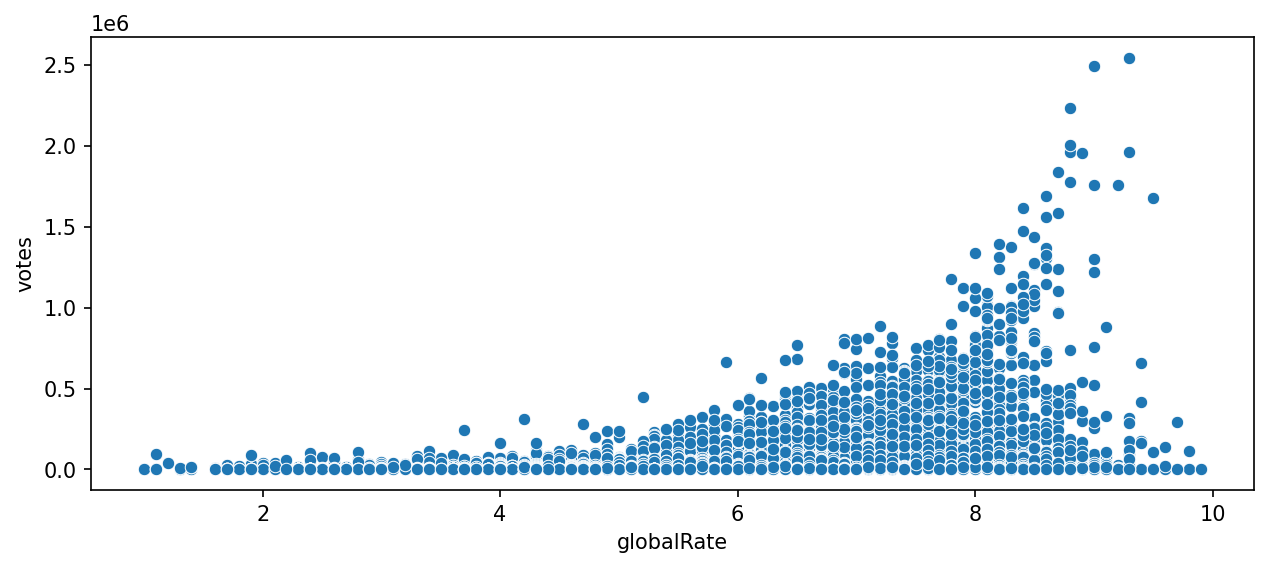

In [16]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=imdb, y='votes', x='globalRate')

> Movies with lower scores between 0 and 5 are less popular \
  Movies with medium scores between 5 and 8 are more popular than the lower ones but are still average  
  Movies with high scores between 8 and 10 are the  most popular

## Movies per year in the dataset 

<AxesSubplot:xlabel='year', ylabel='count'>

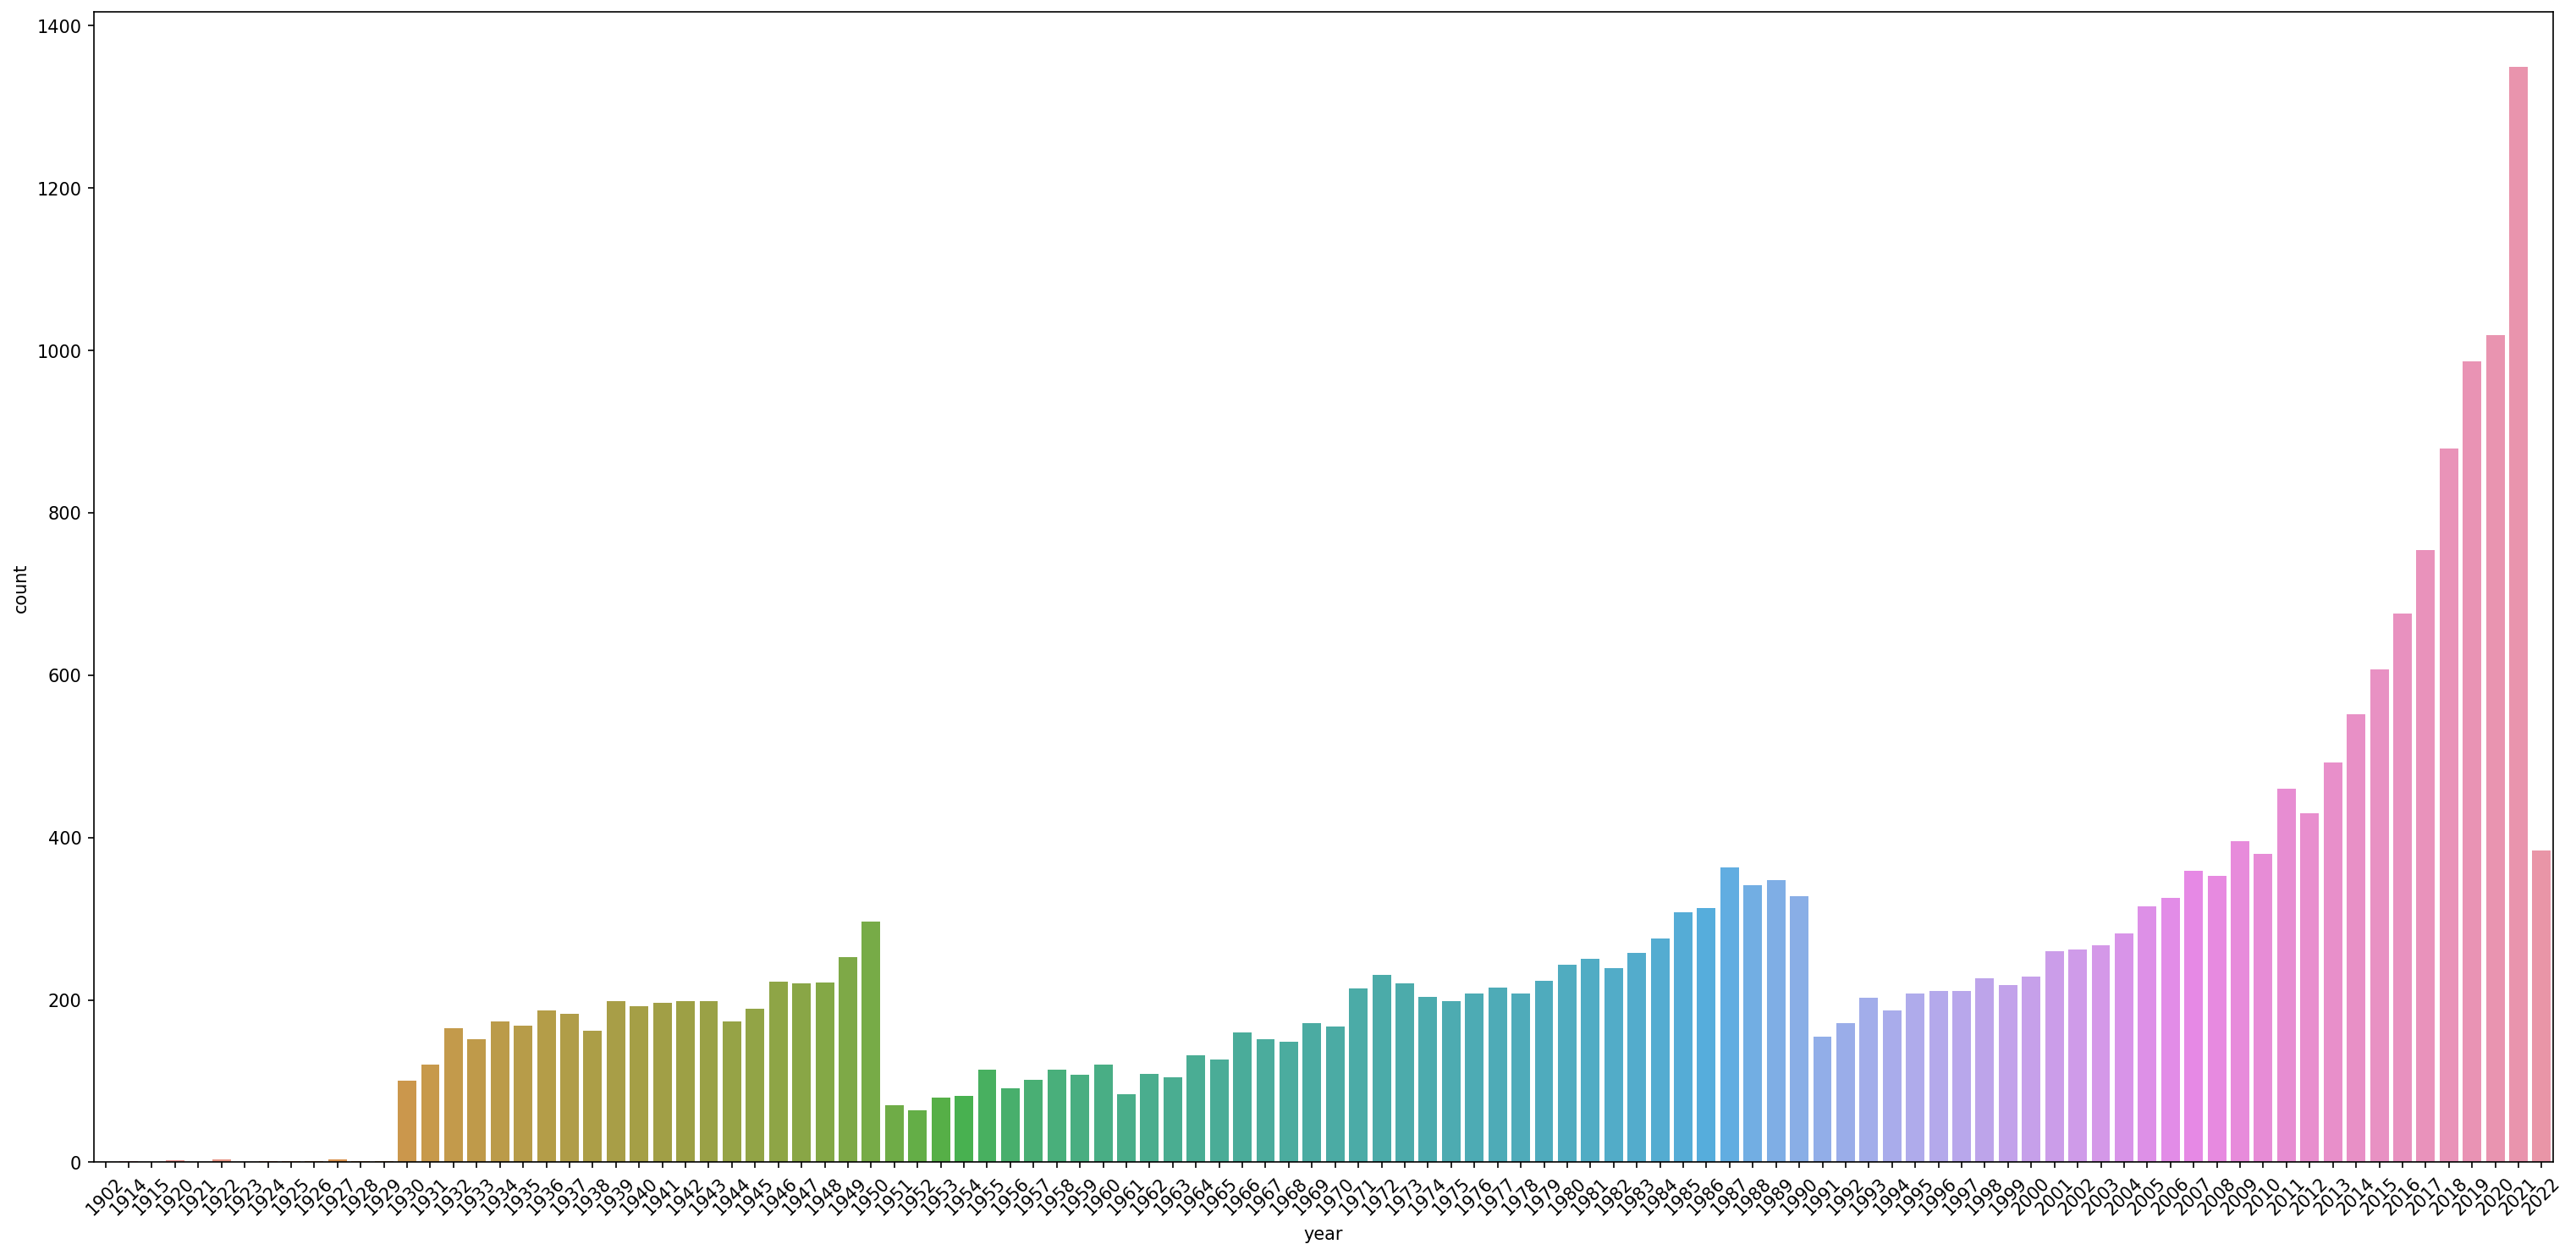

In [17]:
plt.figure(figsize=(25,12), dpi=150)
plt.xticks(rotation=45)
sns.countplot(data=imdb, x='year')



> More movies past 2020 in the dataset

## Determine the correlation between the features

In [18]:
corr_matrix=imdb.corr()
corr_matrix

,year,runtime,globalRate,votes
year,1.000000,0.045218,-0.061568,0.155098
runtime,0.045218,1.000000,0.081341,0.096660
globalRate,-0.061568,0.081341,1.000000,0.211150
votes,0.155098,0.096660,0.211150,1.000000


In [19]:
# correlation between globalRate (target variable) and other features 
print(corr_matrix["globalRate"].sort_values(ascending=False))

globalRate    1.000000
votes         0.211150
runtime       0.081341
year         -0.061568
Name: globalRate, dtype: float64


<AxesSubplot:>

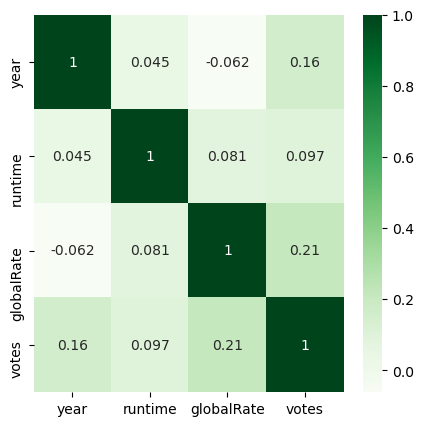

In [20]:
# correlation between features using heatmap 
plt.figure(figsize=(5,5), dpi=100)
sns.heatmap(corr_matrix, annot=True, cmap="Greens")

## 10 movies with the highest vote 

<AxesSubplot:xlabel='title', ylabel='votes'>

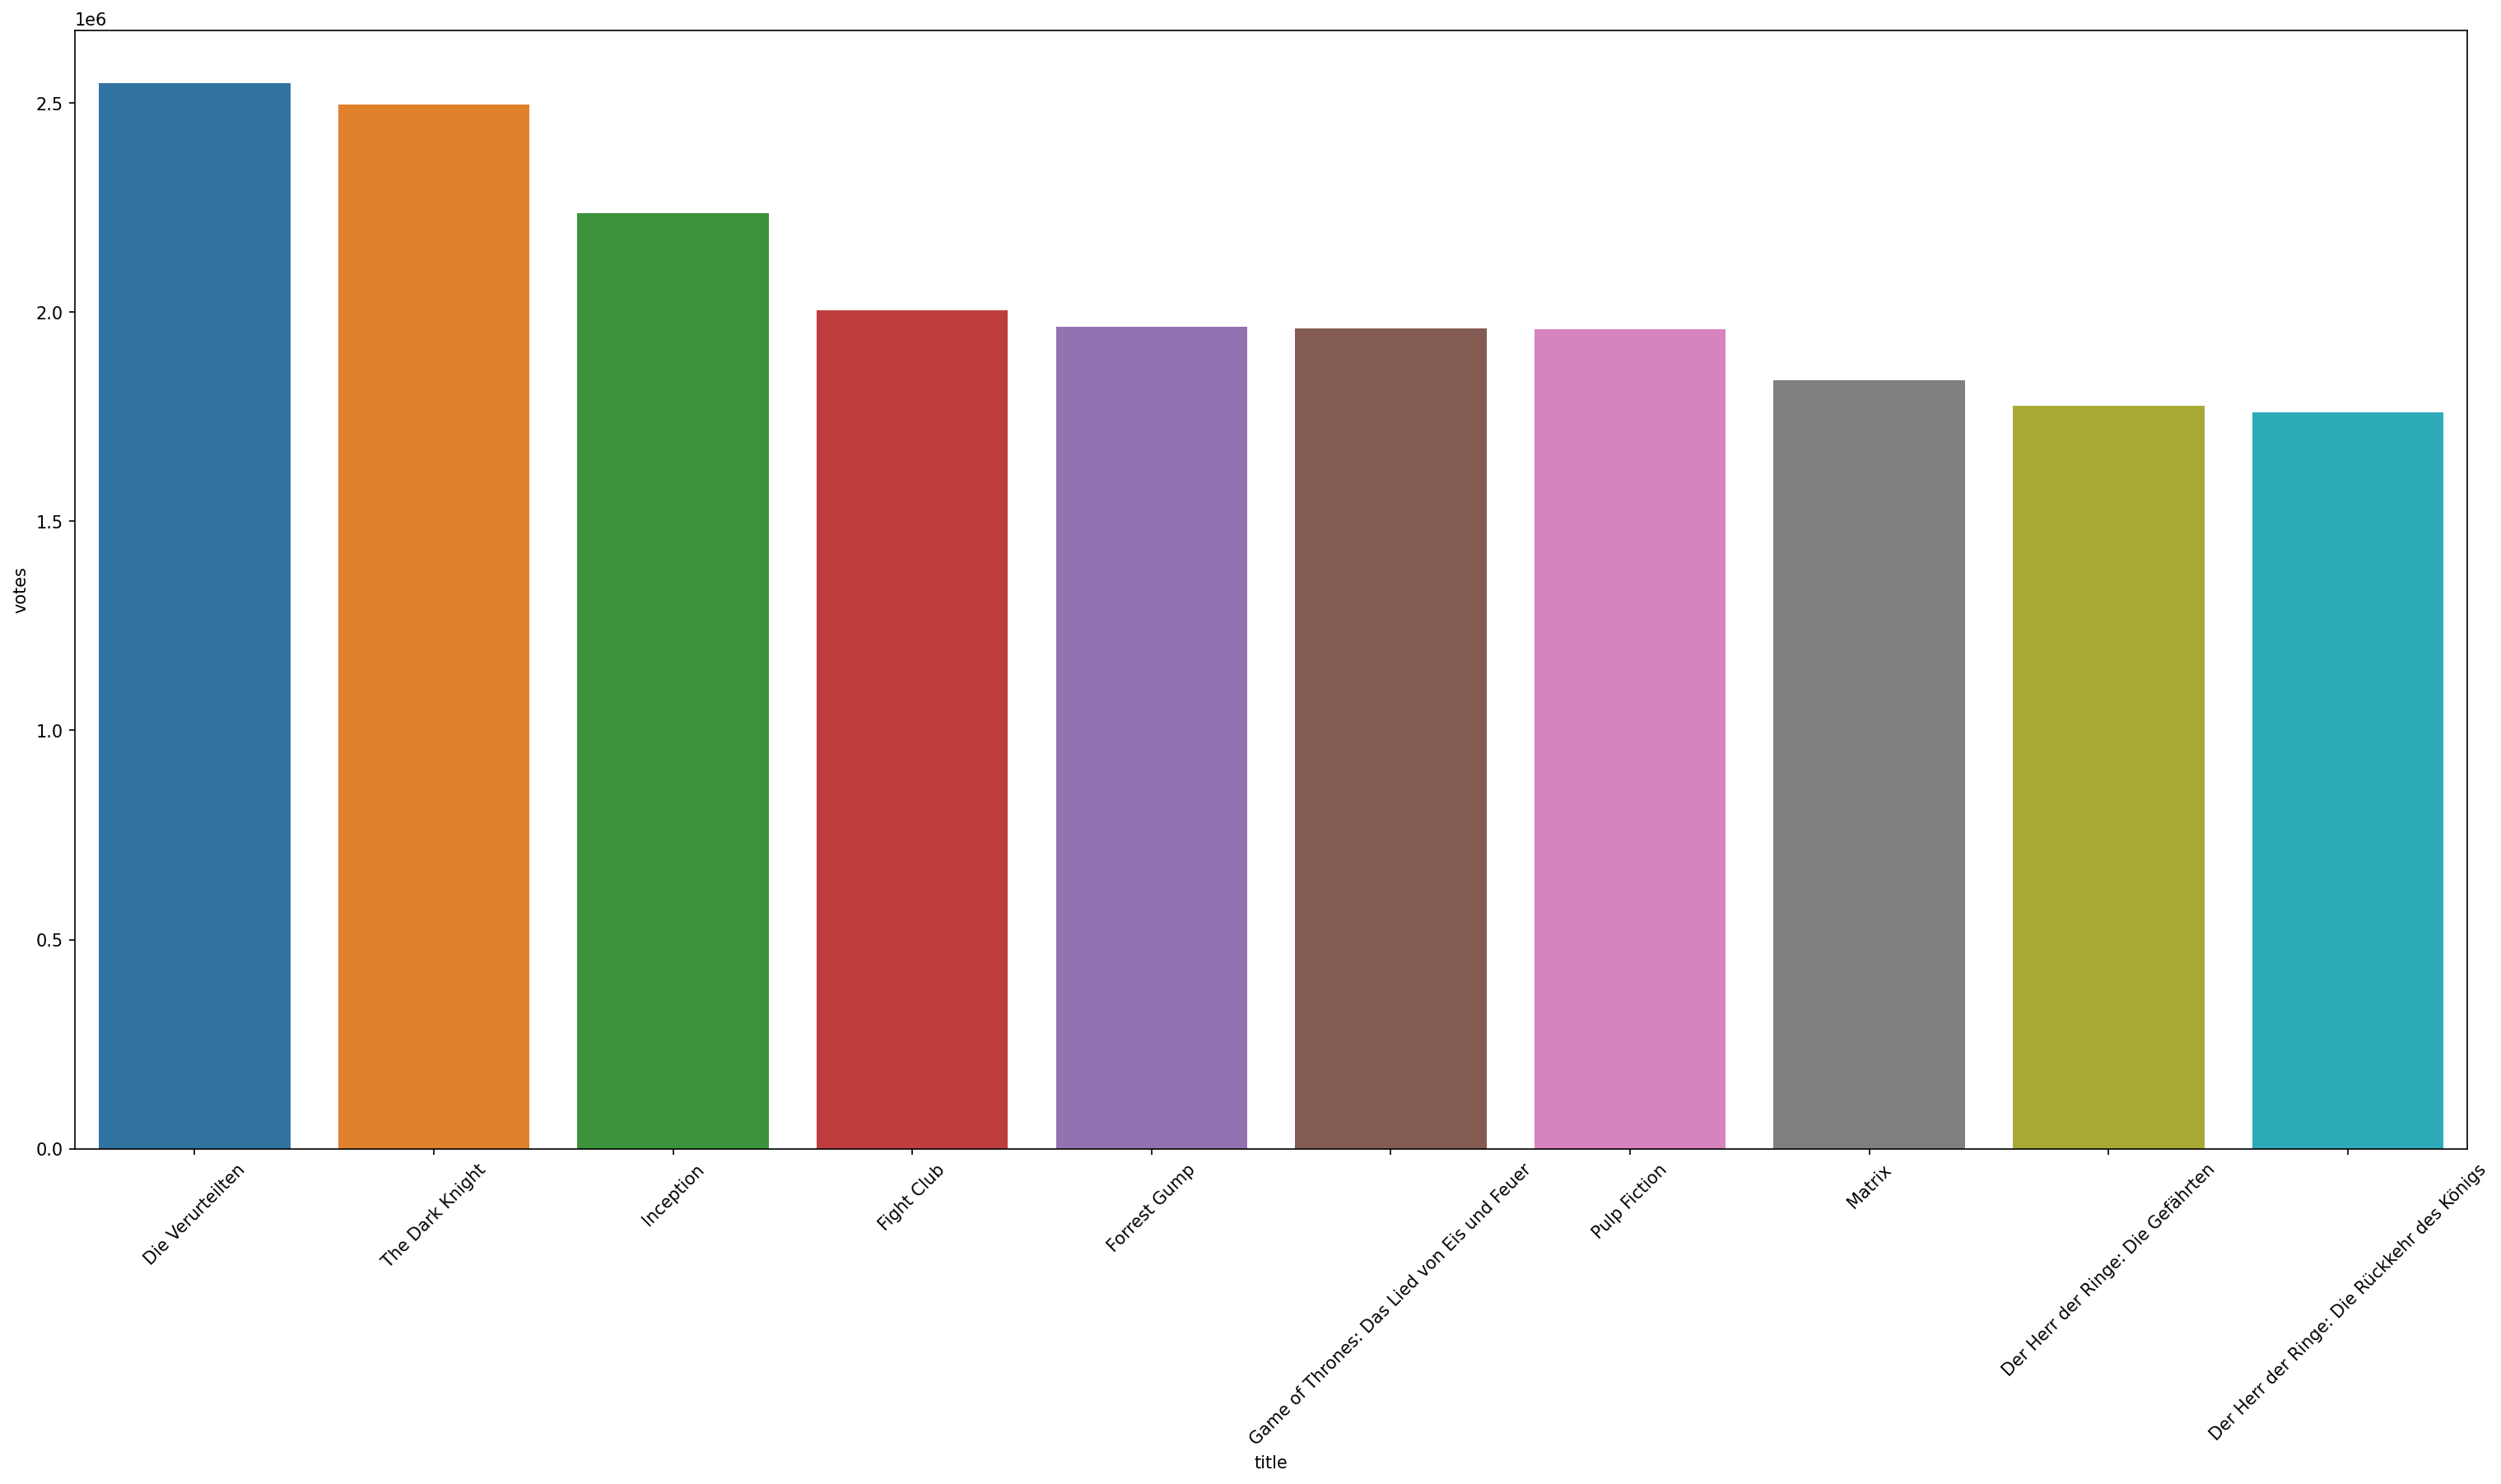

In [21]:
imdb_larg=imdb.nlargest(10, 'votes')
plt.figure(figsize=(25,12), dpi=150)
plt.xticks(rotation=45)
sns.barplot(data =imdb_larg, x='title', y='votes')



# Missing Value

In [49]:
imdb.isnull().sum()

link                     0
title                    0
year                     0
runtime                 20
genre                    0
globalRate               0
text                     0
votes                    0
stars                    8
creator                  8
story_line            5199
tag_line              8404
country_of_origin    18212
language             19681
color                14943
sound_mix            18274
dtype: int64

In [50]:
#  function to calculate the percentage of missing value
def perc_miss(df):
    result = 100 * df.isnull().sum() /len(df)
    result = result[result>0].sort_values()
    return result


In [51]:
#  percentage of missing values for each features 
ratio_omit = perc_miss(imdb)
ratio_omit
# labels = ratio_omit.keys()

stars                 0.031629
creator               0.031629
runtime               0.079073
story_line           20.555094
tag_line             33.226584
color                59.079587
country_of_origin    72.004112
sound_mix            72.249239
language             77.812043
dtype: float64

<AxesSubplot:xlabel='Features', ylabel='Percentage'>

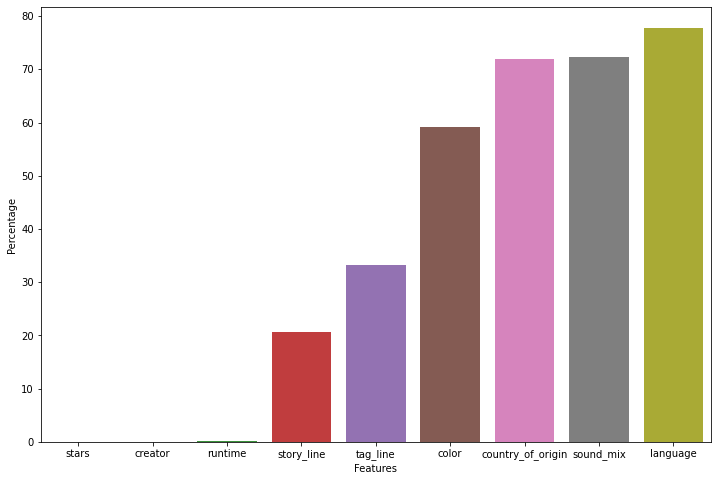

In [52]:
plt.figure(figsize=(12,8))
plt.xlabel('Features')
plt.ylabel('Percentage')
sns.barplot(x=ratio_omit.index, y=ratio_omit)
# plt.ylim(0,1)

In [26]:
ratio_omit[ratio_omit<1]

stars      0.031629
creator    0.031629
runtime    0.079073
dtype: float64

In [55]:
# dropping rows where following features missing values
imdb = imdb.dropna(axis=0, subset=['stars', 'creator', 'runtime'])

In [56]:
ratio_omit = perc_miss(imdb)
ratio_omit

story_line           20.510588
tag_line             33.160499
color                59.065901
country_of_origin    71.996834
sound_mix            72.254106
language             77.807243
dtype: float64

In [57]:
# dropping following columns, because there are missing too much data and doesn't represent any values for the next operation
imdb=imdb.drop(['color', 'country_of_origin', 'sound_mix', 'language'], axis=1)

In [58]:
ratio_omit = perc_miss(imdb)
ratio_omit

story_line    20.510588
tag_line      33.160499
dtype: float64

In [31]:
imdb.head()


,link,title,year,runtime,genre,globalRate,text,votes,stars,creator,story_line,tag_line
0,/title/tt0000417/?ref_=adv_li_tt,Die Reise zum Mond,1902,13.0,Short,8.2,A group of astronomers go on an expedition to ...,48021,"Georges Méliès, Victor André, Bleuette Bernon,...",Georges Méliès,An association of astronomers has convened to ...,NaN
2,/title/tt0004465/?ref_=adv_li_tt,The Perils of Pauline,1914,199.0,Action,6.3,"Pauline, a young maiden, must protect herself ...",1026,"Pearl White, Crane Wilbur, Paul Panzer, Edward...","Louis J. Gasnier, Donald MacKenzie",Young Pauline is left a lot of money when her ...,"The Eclectic Film Company's Great $25,000 Priz..."
3,/title/tt0006206/?ref_=adv_li_tt,Die Vampire,1915,421.0,Action,7.3,An intrepid reporter and his loyal friend batt...,4704,"Musidora, Édouard Mathé, Marcel Lévesque, Jean...",Louis Feuillade,NaN,NaN
4,/title/tt0010323/?ref_=adv_li_tt,Das Cabinet des Dr. Caligari,1920,76.0,Horror,8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",61840,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",Robert Wiene,"Francis, a young man, recalls in his memory th...","The most amazing story ever screened. , ..."
5,/title/tt0011237/?ref_=adv_li_tt,"Der Golem, wie er in die Welt kam",1920,76.0,Fantasy,7.2,"In 16th-century Prague, a rabbi creates the Go...",7514,"Paul Wegener, Albert Steinrück, Ernst Deutsch,...","Paul Wegener, Carl Boese",NaN,Acting that stamps it a masterpiece. Settings ...


In [32]:
imdb.shape

(25265, 12)

## Encoding creator variable

In [59]:
# convert  panda serie  to a list (creator)
s_creator=imdb['creator']
list_creator=s_creator.values.tolist()

In [60]:
# function that split the list into a sublist of creator 
def split_list(thelist):
    
    sublist = []

    for item in thelist:
        item = [item]
        str = "-".join(item)  
        result = str.split(",")   
        sublist.append(result)
    return sublist

In [61]:
list_splited = split_list(list_creator)
list_splited

[['Georges Méliès'],
 ['Louis J. Gasnier', ' Donald MacKenzie'],
 ['Louis Feuillade'],
 ['Robert Wiene'],
 ['Paul Wegener', ' Carl Boese'],
 ['Arthur J. Flaven', ' Harry Revier'],
 ['Charles Chaplin'],
 ['Fritz Lang'],
 ['Benjamin Christensen'],
 ['Robert J. Flaherty'],
 ['F.W. Murnau'],
 ['Mauritz Stiller'],
 ['Abel Gance'],
 ['Buster Keaton'],
 ['Sergei Eisenstein'],
 ['Charles Chaplin'],
 ['David Butler'],
 ['Fritz Lang'],
 ['Clyde Bruckman', ' Buster Keaton'],
 ['Alan Crosland'],
 ['F.W. Murnau'],
 ['William A. Wellman', " Harry d'Abbadie d'Arrast"],
 ['Charles Chaplin'],
 ['Carl Theodor Dreyer'],
 ['Dziga Vertov'],
 ['Robert Siodmak', ' Edgar G. Ulmer', ' Rochus Gliese'],
 ['Erich von Stroheim', ' Richard Boleslawski'],
 ['H.P. Carver'],
 ['Luis Buñuel'],
 ['Julian Johnson'],
 ['D.W. Griffith'],
 ['Lewis Milestone'],
 ['Victor Heerman'],
 ['Jacques Feyder'],
 ['James Parrott'],
 ['Julien Duvivier'],
 ['Roland West'],
 ['Robert Milton', ' Dorothy Arzner', ' Henry Hathaway'],
 ['Jam

In [62]:
# create a new dataframe so that it can yields one creator per column 
df_creator_raw = pd.DataFrame (list_splited, columns = ['1st_creator','2nd_creator','3rd_creator'])
df_creator = df_creator_raw.copy()

In [63]:
df_creator

,1st_creator,2nd_creator,3rd_creator
0,Georges Méliès,None,None
1,Louis J. Gasnier,Donald MacKenzie,None
2,Louis Feuillade,None,None
3,Robert Wiene,None,None
4,Paul Wegener,Carl Boese,None
...,...,...,...
25260,Ahn Bo-Hyun,Park Jin-Joo,Bo-ra Kim
25261,Eliot Laurence,None,None
25262,Sean Ellis,None,None
25263,Fikret Kuskan,Deniz Ugur,Ozan Dolunay


In [64]:
# replace null value by zero
df_creator.fillna(0)

,1st_creator,2nd_creator,3rd_creator
0,Georges Méliès,0,0
1,Louis J. Gasnier,Donald MacKenzie,0
2,Louis Feuillade,0,0
3,Robert Wiene,0,0
4,Paul Wegener,Carl Boese,0
...,...,...,...
25260,Ahn Bo-Hyun,Park Jin-Joo,Bo-ra Kim
25261,Eliot Laurence,0,0
25262,Sean Ellis,0,0
25263,Fikret Kuskan,Deniz Ugur,Ozan Dolunay


In [39]:
df_creator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25265 entries, 0 to 25264
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   1st_creator  25265 non-null  object
 1   2nd_creator  5393 non-null   object
 2   3rd_creator  3167 non-null   object
dtypes: object(3)
memory usage: 592.3+ KB


In [65]:
# convert all values to string
df_creator['2nd_creator']= df_creator['2nd_creator'].apply(str)
df_creator['3rd_creator']= df_creator['3rd_creator'].apply(str)

In [41]:
df_creator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25265 entries, 0 to 25264
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   1st_creator  25265 non-null  object
 1   2nd_creator  25265 non-null  object
 2   3rd_creator  25265 non-null  object
dtypes: object(3)
memory usage: 592.3+ KB


In [66]:
# using count encoding 
import category_encoders as ce
cat_features = ['1st_creator', '2nd_creator', '3rd_creator']
encoder = ce.CountEncoder(cols=cat_features)
creator_encoded = encoder.fit_transform(df_creator[cat_features])

In [67]:
creator_encoded

,1st_creator,2nd_creator,3rd_creator
0,1,19872,22098
1,2,1,22098
2,1,19872,22098
3,1,19872,22098
4,1,1,22098
...,...,...,...
25260,1,1,1
25261,2,19872,22098
25262,4,19872,22098
25263,1,1,1


In [68]:
# using OneHotEncoding 
df_creator_dummies = pd.get_dummies(df_creator)

In [69]:
df_creator_dummies

,1st_creator_A. Edward Sutherland,1st_creator_A.B. Stone,1st_creator_A.D. Miles,1st_creator_A.I. Bezzerides,1st_creator_A.J. Kazinski,1st_creator_A.R. Murugadoss,1st_creator_A.T. Krishnaswamy,1st_creator_A.W. Sandberg,1st_creator_AJ Carothers,1st_creator_AJ Jones,...,3rd_creator_ Zelah Clarke,3rd_creator_ Zhuocheng Wang,3rd_creator_ Zoey Siewert,3rd_creator_ Álex Pina,3rd_creator_ Ángela Molina,3rd_creator_ Åke Jörnfalk,3rd_creator_ Çetin Tekindor,3rd_creator_ Özcan Tekdemir,3rd_creator_ Öznur Serçeler,3rd_creator_None
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0])], remainder='passthrough')
# df_creator = np.array(ct.fit_transform(df_creator)) 


In [70]:
# drop column creator in imdb dataframe
imdb=imdb.drop(['creator'],axis=1)


In [71]:
# reset the index
imdb = imdb.reset_index(drop=True)
imdb

,link,title,year,runtime,genre,globalRate,text,votes,stars,story_line,tag_line
0,/title/tt0000417/?ref_=adv_li_tt,Die Reise zum Mond,1902,13.0,Short,8.2,A group of astronomers go on an expedition to ...,48021,"Georges Méliès, Victor André, Bleuette Bernon,...",An association of astronomers has convened to ...,NaN
1,/title/tt0004465/?ref_=adv_li_tt,The Perils of Pauline,1914,199.0,Action,6.3,"Pauline, a young maiden, must protect herself ...",1026,"Pearl White, Crane Wilbur, Paul Panzer, Edward...",Young Pauline is left a lot of money when her ...,"The Eclectic Film Company's Great $25,000 Priz..."
2,/title/tt0006206/?ref_=adv_li_tt,Die Vampire,1915,421.0,Action,7.3,An intrepid reporter and his loyal friend batt...,4704,"Musidora, Édouard Mathé, Marcel Lévesque, Jean...",NaN,NaN
3,/title/tt0010323/?ref_=adv_li_tt,Das Cabinet des Dr. Caligari,1920,76.0,Horror,8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",61840,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","Francis, a young man, recalls in his memory th...","The most amazing story ever screened. , ..."
4,/title/tt0011237/?ref_=adv_li_tt,"Der Golem, wie er in die Welt kam",1920,76.0,Fantasy,7.2,"In 16th-century Prague, a rabbi creates the Go...",7514,"Paul Wegener, Albert Steinrück, Ernst Deutsch,...",NaN,Acting that stamps it a masterpiece. Settings ...
...,...,...,...,...,...,...,...,...,...,...,...
25260,/title/tt9899340/?ref_=adv_li_tt,Geunyeoui Sasaenghwal,2019,75.0,Comedy,7.8,A romantic comedy about a talented gallery cur...,3380,"Ahn Bo-Hyun, Park Jin-Joo, Bo-ra Kim, Jung Je-Won",NaN,NaN
25261,/title/tt9900092/?ref_=adv_li_tt,Motherland: Fort Salem,2020,42.0,Drama,7.3,A trio of witches is trained to become powerfu...,13094,"Taylor Hickson, Amalia Holm, Demetria McKinney...",NaN,"Born witches. Made warriors. (Season 1) ,..."
25262,/title/tt9907782/?ref_=adv_li_tt,Eight for Silver,2021,113.0,Fantasy,6.2,"In rural 19th-century France, a mysterious, po...",711,"Boyd Holbrook, Kelly Reilly, Alistair Petrie, ...","In the late nineteenth century, brutal land ba...",NaN
25263,/title/tt9910728/?ref_=adv_li_tt,Zalim Istanbul,2019,120.0,Drama,5.9,Seher lives in Istanbul with three children. T...,823,"Fikret Kuskan, Deniz Ugur, Ozan Dolunay, Sera ...",NaN,No one is not the innocent of sin that he is n...


##### I decided to drop those columns because they won't be necessary for the prediction

In [72]:
# drop colums
imdb= imdb.drop(['story_line', 'tag_line'], axis=1)

## Using OneHotEncoding 

In [73]:
# join new creator dataframe to imbd dataframe
imdb_conc = pd.concat([imdb, df_creator_dummies], axis=1)
imdb_conc.head()

,link,title,year,runtime,genre,globalRate,text,votes,stars,1st_creator_A. Edward Sutherland,...,3rd_creator_ Zelah Clarke,3rd_creator_ Zhuocheng Wang,3rd_creator_ Zoey Siewert,3rd_creator_ Álex Pina,3rd_creator_ Ángela Molina,3rd_creator_ Åke Jörnfalk,3rd_creator_ Çetin Tekindor,3rd_creator_ Özcan Tekdemir,3rd_creator_ Öznur Serçeler,3rd_creator_None
0,/title/tt0000417/?ref_=adv_li_tt,Die Reise zum Mond,1902,13.0,Short,8.2,A group of astronomers go on an expedition to ...,48021,"Georges Méliès, Victor André, Bleuette Bernon,...",0,...,0,0,0,0,0,0,0,0,0,1
1,/title/tt0004465/?ref_=adv_li_tt,The Perils of Pauline,1914,199.0,Action,6.3,"Pauline, a young maiden, must protect herself ...",1026,"Pearl White, Crane Wilbur, Paul Panzer, Edward...",0,...,0,0,0,0,0,0,0,0,0,1
2,/title/tt0006206/?ref_=adv_li_tt,Die Vampire,1915,421.0,Action,7.3,An intrepid reporter and his loyal friend batt...,4704,"Musidora, Édouard Mathé, Marcel Lévesque, Jean...",0,...,0,0,0,0,0,0,0,0,0,1
3,/title/tt0010323/?ref_=adv_li_tt,Das Cabinet des Dr. Caligari,1920,76.0,Horror,8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",61840,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",0,...,0,0,0,0,0,0,0,0,0,1
4,/title/tt0011237/?ref_=adv_li_tt,"Der Golem, wie er in die Welt kam",1920,76.0,Fantasy,7.2,"In 16th-century Prague, a rabbi creates the Go...",7514,"Paul Wegener, Albert Steinrück, Ernst Deutsch,...",0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
# checking for missing values
imdb_conc.isnull().sum()

link                           0
title                          0
year                           0
runtime                        0
genre                          0
                              ..
3rd_creator_ Åke Jörnfalk      0
3rd_creator_ Çetin Tekindor    0
3rd_creator_ Özcan Tekdemir    0
3rd_creator_ Öznur Serçeler    0
3rd_creator_None               0
Length: 19427, dtype: int64

In [75]:
# shifting globalRate to last position and separate categorical from numerical features 
col = imdb_conc.pop("globalRate")
imdb_conc.insert(19426, col.name, col)
col_genre =imdb_conc.pop("genre")
imdb_conc.insert(2, col_genre.name, col_genre)
col_text =imdb_conc.pop("text")
imdb_conc.insert(2, col_text.name, col_text)
col_stars =imdb_conc.pop("stars")
imdb_conc.insert(2, col_stars.name, col_stars)


In [76]:
imdb_conc

,link,title,stars,text,genre,year,runtime,votes,1st_creator_A. Edward Sutherland,1st_creator_A.B. Stone,...,3rd_creator_ Zhuocheng Wang,3rd_creator_ Zoey Siewert,3rd_creator_ Álex Pina,3rd_creator_ Ángela Molina,3rd_creator_ Åke Jörnfalk,3rd_creator_ Çetin Tekindor,3rd_creator_ Özcan Tekdemir,3rd_creator_ Öznur Serçeler,3rd_creator_None,globalRate
0,/title/tt0000417/?ref_=adv_li_tt,Die Reise zum Mond,"Georges Méliès, Victor André, Bleuette Bernon,...",A group of astronomers go on an expedition to ...,Short,1902,13.0,48021,0,0,...,0,0,0,0,0,0,0,0,1,8.2
1,/title/tt0004465/?ref_=adv_li_tt,The Perils of Pauline,"Pearl White, Crane Wilbur, Paul Panzer, Edward...","Pauline, a young maiden, must protect herself ...",Action,1914,199.0,1026,0,0,...,0,0,0,0,0,0,0,0,1,6.3
2,/title/tt0006206/?ref_=adv_li_tt,Die Vampire,"Musidora, Édouard Mathé, Marcel Lévesque, Jean...",An intrepid reporter and his loyal friend batt...,Action,1915,421.0,4704,0,0,...,0,0,0,0,0,0,0,0,1,7.3
3,/title/tt0010323/?ref_=adv_li_tt,Das Cabinet des Dr. Caligari,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","Hypnotist Dr. Caligari uses a somnambulist, Ce...",Horror,1920,76.0,61840,0,0,...,0,0,0,0,0,0,0,0,1,8.1
4,/title/tt0011237/?ref_=adv_li_tt,"Der Golem, wie er in die Welt kam","Paul Wegener, Albert Steinrück, Ernst Deutsch,...","In 16th-century Prague, a rabbi creates the Go...",Fantasy,1920,76.0,7514,0,0,...,0,0,0,0,0,0,0,0,1,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25260,/title/tt9899340/?ref_=adv_li_tt,Geunyeoui Sasaenghwal,"Ahn Bo-Hyun, Park Jin-Joo, Bo-ra Kim, Jung Je-Won",A romantic comedy about a talented gallery cur...,Comedy,2019,75.0,3380,0,0,...,0,0,0,0,0,0,0,0,0,7.8
25261,/title/tt9900092/?ref_=adv_li_tt,Motherland: Fort Salem,"Taylor Hickson, Amalia Holm, Demetria McKinney...",A trio of witches is trained to become powerfu...,Drama,2020,42.0,13094,0,0,...,0,0,0,0,0,0,0,0,1,7.3
25262,/title/tt9907782/?ref_=adv_li_tt,Eight for Silver,"Boyd Holbrook, Kelly Reilly, Alistair Petrie, ...","In rural 19th-century France, a mysterious, po...",Fantasy,2021,113.0,711,0,0,...,0,0,0,0,0,0,0,0,1,6.2
25263,/title/tt9910728/?ref_=adv_li_tt,Zalim Istanbul,"Fikret Kuskan, Deniz Ugur, Ozan Dolunay, Sera ...",Seher lives in Istanbul with three children. T...,Drama,2019,120.0,823,0,0,...,0,0,0,0,0,0,0,0,0,5.9


### Splitting dataset into Training set and Test set 

In [77]:
# selection only the numerical value
X = imdb_conc.iloc[:, 5:-1].values
y = imdb_conc.iloc[:, -1].values

In [64]:
print('Value of X:\n', X)
print('\n Value of y:\n', y)

Value of X:
 [[1.9020e+03 1.3000e+01 4.8021e+04 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.9140e+03 1.9900e+02 1.0260e+03 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.9150e+03 4.2100e+02 4.7040e+03 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [2.0210e+03 1.1300e+02 7.1100e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [2.0190e+03 1.2000e+02 8.2300e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0190e+03 1.0000e+01 1.9500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]]

 Value of y:
 [8.2 6.3 7.3 ... 6.2 5.9 5.6]


In [78]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Using Multiple Linear Regression

In [79]:
# Training the Multiple Linear Regression model on the Training set (took 3 hours)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [80]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3.99e+04  7.10e+00]
 [ 1.47e+04  6.40e+00]
 [ 7.35e+00  7.60e+00]
 ...
 [-1.07e+04  6.20e+00]
 [ 6.57e+00  5.60e+00]
 [ 6.79e+00  6.80e+00]]


In [82]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
mlr3_r2_score     = r2_score(y_test, y_pred)
mlr3_mean_squared = mean_squared_error(y_test, y_pred)
mlr3_root_ms      = mean_squared_error(y_test, y_pred, squared=False) 

# Evaluating the Model Performance using r-square
print('r-square: ' ,mlr3_r2_score,'\n')
# Evaluating the Model Performance usisng mean squared error
print('MSE: ',mlr3_mean_squared, '\n' )
# Evaluating the Model Performance usisng root mean squared error
print('RMSE: ',mlr3_root_ms)



from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
ml_regressor = LinearRegression()
ml_regressor.fit(X1_train, np.ravel(y1_train))

# Predicting the Test set results
ml_pred = ml_regressor.predict(X1_test)
np.set_printoptions(precision=2)
print(np.concatenate((ml_pred.reshape(len(ml_pred),1), y1_test.reshape(len(y1_test),1)),1), '\n')

r-square:  -873505700435.4487 

MSE:  1343043188722.908 

RMSE:  1158897.402155561


### Using Support Vector regression

It was taking so much time we decided to not continue with it 

# With count encoding 

In [85]:

# join new creator dataframe to imbd dataframe
imdb_count_enc = pd.concat([imdb, creator_encoded], axis=1)
imdb_count_enc

,link,title,year,runtime,genre,globalRate,text,votes,stars,1st_creator,2nd_creator,3rd_creator
0,/title/tt0000417/?ref_=adv_li_tt,Die Reise zum Mond,1902,13.0,Short,8.2,A group of astronomers go on an expedition to ...,48021,"Georges Méliès, Victor André, Bleuette Bernon,...",1,19872,22098
1,/title/tt0004465/?ref_=adv_li_tt,The Perils of Pauline,1914,199.0,Action,6.3,"Pauline, a young maiden, must protect herself ...",1026,"Pearl White, Crane Wilbur, Paul Panzer, Edward...",2,1,22098
2,/title/tt0006206/?ref_=adv_li_tt,Die Vampire,1915,421.0,Action,7.3,An intrepid reporter and his loyal friend batt...,4704,"Musidora, Édouard Mathé, Marcel Lévesque, Jean...",1,19872,22098
3,/title/tt0010323/?ref_=adv_li_tt,Das Cabinet des Dr. Caligari,1920,76.0,Horror,8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",61840,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",1,19872,22098
4,/title/tt0011237/?ref_=adv_li_tt,"Der Golem, wie er in die Welt kam",1920,76.0,Fantasy,7.2,"In 16th-century Prague, a rabbi creates the Go...",7514,"Paul Wegener, Albert Steinrück, Ernst Deutsch,...",1,1,22098
...,...,...,...,...,...,...,...,...,...,...,...,...
25260,/title/tt9899340/?ref_=adv_li_tt,Geunyeoui Sasaenghwal,2019,75.0,Comedy,7.8,A romantic comedy about a talented gallery cur...,3380,"Ahn Bo-Hyun, Park Jin-Joo, Bo-ra Kim, Jung Je-Won",1,1,1
25261,/title/tt9900092/?ref_=adv_li_tt,Motherland: Fort Salem,2020,42.0,Drama,7.3,A trio of witches is trained to become powerfu...,13094,"Taylor Hickson, Amalia Holm, Demetria McKinney...",2,19872,22098
25262,/title/tt9907782/?ref_=adv_li_tt,Eight for Silver,2021,113.0,Fantasy,6.2,"In rural 19th-century France, a mysterious, po...",711,"Boyd Holbrook, Kelly Reilly, Alistair Petrie, ...",4,19872,22098
25263,/title/tt9910728/?ref_=adv_li_tt,Zalim Istanbul,2019,120.0,Drama,5.9,Seher lives in Istanbul with three children. T...,823,"Fikret Kuskan, Deniz Ugur, Ozan Dolunay, Sera ...",1,1,1


In [86]:
# replace maximum value by 0 in the dataset
max12=imdb_count_enc['2nd_creator'].max()
max13=imdb_count_enc['3rd_creator'].max()
imdb_count_enc.loc[(imdb_count_enc['2nd_creator']==max12), '2nd_creator']=0
imdb_count_enc.loc[(imdb_count_enc['3rd_creator']==max13), '3rd_creator']=0

In [87]:
# shifting globalRate to last position
col = imdb_count_enc.pop("globalRate")
imdb_count_enc.insert(11, col.name, col)
col_genre =imdb_count_enc.pop("genre")
imdb_count_enc.insert(2, col_genre.name, col_genre)
col_text =imdb_count_enc.pop("text")
imdb_count_enc.insert(2, col_text.name, col_text)
col_stars =imdb_count_enc.pop("stars")
imdb_count_enc.insert(2, col_stars.name, col_stars)

In [88]:
imdb_count_enc.head()

,link,title,stars,text,genre,year,runtime,votes,1st_creator,2nd_creator,3rd_creator,globalRate
0,/title/tt0000417/?ref_=adv_li_tt,Die Reise zum Mond,"Georges Méliès, Victor André, Bleuette Bernon,...",A group of astronomers go on an expedition to ...,Short,1902,13.0,48021,1,0,0,8.2
1,/title/tt0004465/?ref_=adv_li_tt,The Perils of Pauline,"Pearl White, Crane Wilbur, Paul Panzer, Edward...","Pauline, a young maiden, must protect herself ...",Action,1914,199.0,1026,2,1,0,6.3
2,/title/tt0006206/?ref_=adv_li_tt,Die Vampire,"Musidora, Édouard Mathé, Marcel Lévesque, Jean...",An intrepid reporter and his loyal friend batt...,Action,1915,421.0,4704,1,0,0,7.3
3,/title/tt0010323/?ref_=adv_li_tt,Das Cabinet des Dr. Caligari,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...","Hypnotist Dr. Caligari uses a somnambulist, Ce...",Horror,1920,76.0,61840,1,0,0,8.1
4,/title/tt0011237/?ref_=adv_li_tt,"Der Golem, wie er in die Welt kam","Paul Wegener, Albert Steinrück, Ernst Deutsch,...","In 16th-century Prague, a rabbi creates the Go...",Fantasy,1920,76.0,7514,1,1,0,7.2


In [89]:
X1 = imdb_count_enc.iloc[:, 5:-1].values
y1 = imdb_count_enc.iloc[:, -1].values

print('Value of X1:\n', X1)
print('\n Value of y1:\n', y1)
y1 = y1.reshape(len(y1),1)
print('\n Value of y1:\n', y1)


Value of X1:
 [[1.90e+03 1.30e+01 4.80e+04 1.00e+00 0.00e+00 0.00e+00]
 [1.91e+03 1.99e+02 1.03e+03 2.00e+00 1.00e+00 0.00e+00]
 [1.92e+03 4.21e+02 4.70e+03 1.00e+00 0.00e+00 0.00e+00]
 ...
 [2.02e+03 1.13e+02 7.11e+02 4.00e+00 0.00e+00 0.00e+00]
 [2.02e+03 1.20e+02 8.23e+02 1.00e+00 1.00e+00 1.00e+00]
 [2.02e+03 1.00e+01 1.95e+02 1.00e+00 0.00e+00 0.00e+00]]

 Value of y1:
 [8.2 6.3 7.3 ... 6.2 5.9 5.6]

 Value of y1:
 [[8.2]
 [6.3]
 [7.3]
 ...
 [6.2]
 [5.9]
 [5.6]]


## Using support vector regression model on the Training set

In [89]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

## Normalization 
$ x^\prime=\frac{x-x_{min}}{x_{max}-x_{min}}$

## Standardization 
$ x^\prime=\frac{x-\mu}{\sigma}$ 

In [90]:
# Feature Scaling (took 2 minutes)
from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
sc_y1 = StandardScaler()
X1_train = sc_X1.fit_transform(X1_train)
y1_train = sc_y1.fit_transform(y1_train)

In [91]:
print('Value of X1:\n', X1_train)
print('\n Value of y1:\n', y1_train)


Value of X1:
 [[ 1.01509031  1.58588955 -0.32891995 -0.43696707  0.58123497  1.96700262]
 [ 0.44042352  0.18172066  0.50406251 -0.56490372 -0.31589533 -0.33695293]
 [ 0.72775691 -0.13588897 -0.27968854 -0.43696707 -0.31589533 -0.33695293]
 ...
 [-0.09832661  0.031274   -0.32314671 -0.56490372 -0.31589533 -0.33695293]
 [ 0.00942342 -0.13588897 -0.28576072 -0.69284036 -0.31589533 -0.33695293]
 [-1.57091027 -0.60394526 -0.32830339  1.35414598 -0.31589533 -0.33695293]]

 Value of y1:
 [[-0.03202369]
 [ 0.44683902]
 [-2.18690585]
 ...
 [-0.03202369]
 [ 0.20740766]
 [-0.35126549]]


In [92]:
# Training the SVR model on the whole dataset (took 2 minutes)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X1_train, np.ravel(y1_train))

SVR()

In [93]:
y1_pred = sc_y1.inverse_transform(regressor.predict(sc_X1.transform(X1_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test.reshape(len(y1_test),1)),1))

[[5.96 7.1 ]
 [7.33 6.4 ]
 [6.78 7.6 ]
 ...
 [7.01 6.2 ]
 [6.63 5.6 ]
 [7.08 6.8 ]]


R-squared assesses how strong the linear relationship is between two variables
This measure is represented as a value between 0.0 and 1.0, where a value of 1.0 indicates a perfect fit, and is thus a highly reliable model for future forecasts, while a value of 0.0 would indicate that the model fails to accurately model the data at all. 

$ R^2 =  ( \frac{1}{N}) \frac{ \sum [ (x_i – xbar) \times (y_i – ybar) ] } {(σx \times σy )^2 }$







Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.

$ MSE = \frac{1}{N}\sum_{i=1}^b(y_i -\hat y_i)^2$

Root mean square error is calculated as the square root of the average squared distance between the actual and the predicted values.

$ RMSE = \frac{1}{N}\sqrt{\sum_{i=1}^b(y_i -\hat y_i)^2}$

In [94]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [95]:
svr_r2_score     = r2_score(y1_test, y1_pred)
svr_mean_squared = mean_squared_error(y1_test, y1_pred)
svr_root_ms      = mean_squared_error(y1_test, y1_pred, squared=False) 

# Evaluating the Model Performance using r-square
print('r-square: ' ,svr_r2_score,'\n')
# Evaluating the Model Performance usisng mean squared error
print('MSE: ',svr_mean_squared, '\n' )
# Evaluating the Model Performance usisng root mean squared error
print('RMSE: ',svr_root_ms)

r-square:  0.36111531136736696 

MSE:  0.9823058155415443 

RMSE:  0.9911134221377209


## Random forest model on the Training set

In [96]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [97]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X1_train, np.ravel(y1_train))


RandomForestRegressor(n_estimators=10, random_state=0)

In [98]:
# Predicting the Test set results
rf_pred = rf_regressor.predict(X1_test)
np.set_printoptions(precision=2)
print(np.concatenate((rf_pred.reshape(len(rf_pred),1), y1_test.reshape(len(y1_test),1)),1))


[[6.63 7.1 ]
 [7.95 6.4 ]
 [6.   7.6 ]
 ...
 [6.86 6.2 ]
 [6.78 5.6 ]
 [7.02 6.8 ]]


In [99]:
rf_r2_score         = r2_score(y1_test, rf_pred)
rf_mean_squared = mean_squared_error(y1_test, rf_pred)
rf_root_ms          = mean_squared_error(y1_test, rf_pred, squared=False)

# Evaluating the Model Performance using r-square
print('r-square: ' ,rf_r2_score,'\n')

# Evaluating the Model Performance usisng mean squared error
print('MSE: ',rf_mean_squared, '\n' )

# Evaluating the Model Performance usisng root mean squared error
print('RMSE: ', rf_root_ms)


r-square:  0.3707315575570691 

MSE:  0.9675205268597313 

RMSE:  0.9836262129791639


## Decision Tree Regression Model on the training set

In [100]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
dtr_regressor = DecisionTreeRegressor(random_state = 0)
dtr_regressor.fit(X1_train, np.ravel(y1_train))


# Predicting the Test set results
dtr_pred = dtr_regressor.predict(X1_test)
np.set_printoptions(precision=2)
print(np.concatenate((dtr_pred.reshape(len(dtr_pred),1), y1_test.reshape(len(y1_test),1)),1))


[[6.9 7.1]
 [8.3 6.4]
 [6.2 7.6]
 ...
 [7.7 6.2]
 [6.2 5.6]
 [6.6 6.8]]


In [101]:
dtr_r2_score         = r2_score(y1_test, dtr_pred)
dtr_mean_squared     = mean_squared_error(y1_test, dtr_pred)
dtr_root_ms          = mean_squared_error(y1_test, dtr_pred, squared=False)

# Evaluating the Model Performance using r-square
print('r-square: ' ,dtr_r2_score,'\n')

# Evaluating the Model Performance usisng mean squared error
print('MSE: ',dtr_mean_squared, '\n' )

# Evaluating the Model Performance usisng root mean squared error
print('RMSE: ',dtr_root_ms)

r-square:  -0.09953430828742849 

MSE:  1.6905694636849398 

RMSE:  1.3002190060466505


## Polynomial regression model on the training set

In [102]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X1_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, np.ravel(y1_train))

# Predicting the Test set results
poly_pred = poly_regressor.predict(poly_reg.transform(X1_test))
np.set_printoptions(precision=2)
print(np.concatenate((poly_pred.reshape(len(poly_pred),1), y1_test.reshape(len(y1_test),1)),1))


[[ 4.69  7.1 ]
 [ 9.25  6.4 ]
 [ 6.43  7.6 ]
 ...
 [10.86  6.2 ]
 [ 5.63  5.6 ]
 [ 6.92  6.8 ]]


In [103]:
poly_r2_score         = r2_score(y1_test, poly_pred)
poly_mean_squared     = mean_squared_error(y1_test, poly_pred)
poly_root_ms          = mean_squared_error(y1_test, poly_pred, squared=False)

# Evaluating the Model Performance using r-square
print('r-square: ' ,poly_r2_score,'\n')

# Evaluating the Model Performance usisng mean squared error
print('MSE: ',poly_mean_squared, '\n' )

# Evaluating the Model Performance usisng root mean squared error
print('RMSE: ',poly_root_ms)

r-square:  -4.636556845886108 

MSE:  8.666387953661184 

RMSE:  2.9438729513450785


## Multiple linear regression model on the training set

In [90]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
ml_regressor = LinearRegression()
ml_regressor.fit(X1_train, (y1_train))

# Predicting the Test set results
ml_pred = ml_regressor.predict(X1_test)
np.set_printoptions(precision=2)
print(np.concatenate((ml_pred.reshape(len(ml_pred),1), y1_test.reshape(len(y1_test),1)),1), '\n')

ml_r2_score         = r2_score(y1_test, ml_pred)
ml_mean_squared     = mean_squared_error(y1_test, ml_pred)
ml_root_ms          = mean_squared_error(y1_test, ml_pred, squared=False)

# Evaluating the Model Performance using r-square
print('r-square: ' ,ml_r2_score,'\n')

# Evaluating the Model Performance usisng mean squared error
print('MSE: ',ml_mean_squared, '\n' )

# Evaluating the Model Performance usisng root mean squared error
print('RMSE: ',ml_root_ms)

[[6.01 7.1 ]
 [7.   6.4 ]
 [6.39 7.6 ]
 ...
 [6.84 6.2 ]
 [6.2  5.6 ]
 [6.43 6.8 ]] 

r-square:  0.13066393886599337 

MSE:  1.3366322338066685 

RMSE:  1.1561281217091246



## Comparison of  performance 

In [105]:
# initialize data of lists
data = {'R-square':[svr_r2_score, rf_r2_score, dtr_r2_score, poly_r2_score, ml_r2_score],
        'MSE':[svr_mean_squared, rf_mean_squared, dtr_mean_squared, poly_mean_squared, ml_mean_squared],
        'RMSE':[svr_root_ms, rf_root_ms, dtr_root_ms, poly_root_ms, ml_root_ms]
       }


# create pandas DataFrame
compare_table = pd.DataFrame(data, index =['Support Vector',
                                'Random Forest',
                                'Decision Tree',
                                'Polynomial Reg',
                                'Multiple Linear Reg'])

compare_table.sort_values(by='R-square', ascending=False)


,R-square,MSE,RMSE
Random Forest,0.370732,0.967521,0.983626
Support Vector,0.361115,0.982306,0.991113
Multiple Linear Reg,0.130664,1.336632,1.156128
Decision Tree,-0.099534,1.690569,1.300219
Polynomial Reg,-4.636557,8.666388,2.943873



## Hyperparameter tuning 

In [106]:
rf_regressor.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}